# Generate random numbers and spot outliers

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate random uniform and normal nambers

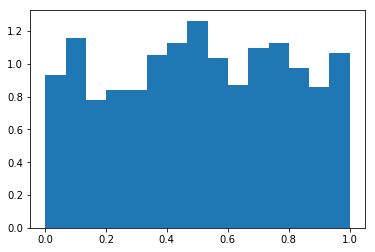

In [24]:
## generate random uniform numbers
rand_unif = np.random.uniform(low=0, high=1, size=1000)
_ = plt.hist(rand_unif, bins=15, normed=True)

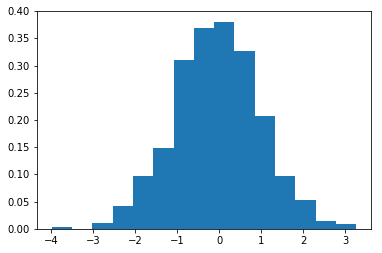

In [25]:
## generate random normals
rand_normal = np.random.normal(loc=0, scale=1, size=1000)
_ = plt.hist(rand_normal, bins=15, normed=True)

## Spot and delete outliers

In [105]:
############## Spot outliers ####################
## generate random uniform numbers
random_uniform = np.random.uniform(0, 1, 10)

## set some values to be big
for i in [1, 4, 7]:
    random_uniform[i] = 40
    
## the threshold for outliers
outlier_threshold = np.median(random_uniform) + 2 * np.std(random_uniform)

## find the outliers and set to nan
for i, value in np.ndenumerate(random_uniform):
    if value > outlier_threshold:
        random_uniform[i] = None
print(random_uniform)
# delete nan values
random_uniform = random_uniform[~np.isnan(random_uniform)]
random_uniform

[ 0.72903235         nan  0.54328896  0.6702424          nan  0.77119614
  0.8145356          nan  0.36348555  0.00967293]


array([ 0.72903235,  0.54328896,  0.6702424 ,  0.77119614,  0.8145356 ,
        0.36348555,  0.00967293])

In [109]:
## Faster way to delete the outliers
## generate random uniform numbers
random_uniform = np.random.uniform(0, 1, 10)

## set some values to be big
for i in [1, 4, 7]:
    random_uniform[i] = 40
print(random_uniform)

def reject_outliers(data, m=2):
    return data[abs(data - np.median(data)) < m * np.std(data)]

print(reject_outliers(random_uniform))

[  0.76020576  40.           0.90301888   0.99056471  40.           0.33934337
   0.23730585  40.           0.94409378   0.31477719]
[ 0.76020576  0.90301888  0.99056471  0.33934337  0.23730585  0.94409378
  0.31477719]
